In [49]:
import sys
if 'src' not in sys.path:
    sys.path.append('src')
from SimpleEC import *
from operators import *
from sklearn.metrics import mean_absolute_error

In [89]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
s=np.sin(np.arange(-50,50,0.05))**2+np.random.random(2000)

In [90]:
from src.knr import KNNR, wsplit

In [91]:
X,Y=wsplit(s,10,1)

In [92]:
x=X[:-48]
y=Y[:-48]
xv=X[-48:-24]
yv=Y[-48:-24]
xt=X[-24:]
yt=Y[-24:]

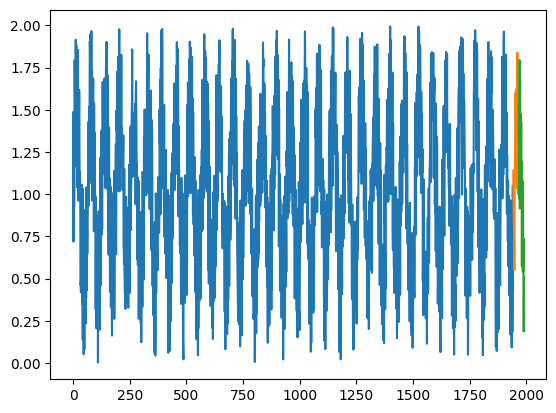

In [93]:
n=len(y)
nv=len(yv)
nt=len(yt)
plt.plot(range(0,n),y, label='train')
plt.plot(range(n,n+nv),yv, label='validacion')
plt.plot(range(n+nv,n+nv+nt),yt, label='prueba')

In [94]:
reg=DecisionTreeRegressor(criterion='poisson', max_depth=20)
reg.fit(x,y)

DecisionTreeRegressor(criterion='poisson', max_depth=20)

In [95]:
yp=reg.predict(xv)
mean_absolute_error(yv,yp)

0.3251447003423733

In [96]:
reg=DecisionTreeRegressor(criterion='poisson', max_depth=10)
reg.fit(x,y)

DecisionTreeRegressor(criterion='poisson', max_depth=10)

0.17210709167110463


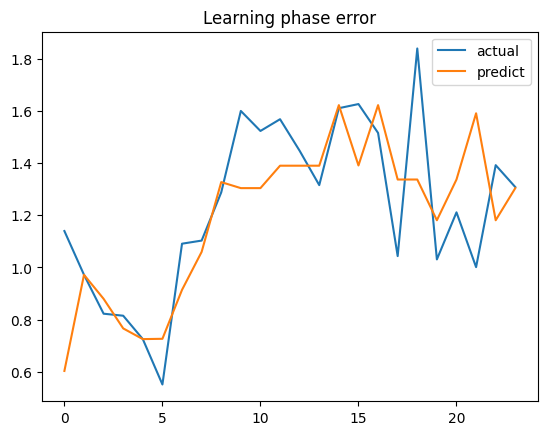

In [101]:
yp=reg.predict(xv)
print(mean_absolute_error(yv,yp))
plt.plot(yv,label='actual')
plt.plot(yp,label='predict')
plt.title("Learning phase error")
plt.legend()

0.2782721742877892


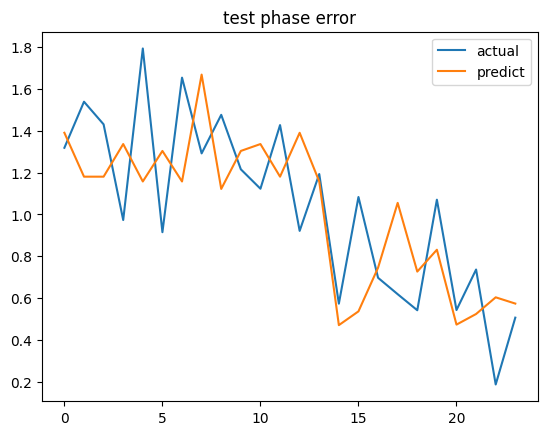

In [102]:
breg=reg.fit(X[:-24],Y[:-24])
mean_absolute_error(yt,reg.predict(xt))
yp1=reg.predict(xt)
print(mean_absolute_error(yt,yp1))
plt.plot(yt,label='actual')
plt.plot(yp1,label='predict')
plt.title("test phase error")
plt.legend()